## Chapter 7: Policy Gradient Methods

### Policy-based Reinforcement Learning

In previous chapters, we focused on learning value function and generate policy from it. Yet there are RL algorithms that directly generate the policy from experience: **Policy-based RL**.

In policy-based RL, we use parametrized policy by differentiable parameter $\theta$. 
</br>
</br>
<font size="3">
$$\begin{align}
\pi_\theta(a|s) = \mathbb{P}[a |s, \theta]
\end{align}$$
</font>

Policy-based RL is effective in **high-dimensional** or **continuous action spaces**, and able to learn **stochastic policies**.


#### Policy Gradient Theorem

In policy gradient, policy parameter $\theta$ is updated by some scalar performance measure $\mathcal{J}(\theta)$ with respect to the policy parameter. To maximize policy performance, their updates approximate **gradient ascent** in $\mathcal{J}$:
</br>
</br>
<font size="3">
$$\begin{align}
\theta_{t+1} = \theta_t + \alpha \nabla \mathcal{J}(\theta_t)
\end{align}$$
</font>

where $\alpha$ is a step-size parameter..

Then what can be the performance measure $\mathcal{J}(\theta)$ for MDP policy in finite episode?

In episodic case trajectory $\tau$. Then, we can define $\mathcal{J}(\theta)$ as its value.
</br>
</br>
<font size="3">
$$\begin{align}
\mathcal{J}(\theta) = \sum_{s \in \mathcal{S}} d^\pi(s)v_\pi(s) = \sum_{s \in \mathcal{S}} d^\pi(s) \sum_{a \in \mathcal{A}} \pi_\theta(a|s) q_\pi(s, a)
\end{align}$$
</font>
where $d^\pi$ is the stationary distribution for Markov chain for $\pi_\theta$.

Then gradient of $\mathcal{J}$ can be reformatted as the following:
</br>
</br>
<font size="3">
$$\begin{align}
\nabla_\theta \mathcal{J}(\theta) = \nabla_\theta \sum_{s \in \mathcal{S}} d^\pi(s) \sum_{a \in \mathcal{A}} \pi_\theta(a|s) Q_\pi(s, a) & \\
\propto \sum_{s \in \mathcal{S}} d^\pi(s) \sum_{a \in \mathcal{A}} Q_\pi(s, a) \nabla_\theta \pi_\theta(a|s) \\
 = \sum_{s \in \mathcal{S}} d^\pi(s) \sum_{a \in \mathcal{A}} \pi_\theta(s, a) Q_\pi(s, a) \dfrac{\nabla_\theta \pi_\theta(a|s)}{\pi_\theta(a|s)} \\ 
= \mathbb{E}_\pi [Q_\pi(s,a) \nabla_\theta \log \pi_\theta(s,a)]
\end{align}$$
</font>

where $\mathbb{E}_\pi$ refers to $\mathbb{E}_{s \sim d_\pi, a \sim \pi_\theta}$ and $Q_\pi$ means **true state-value** under policy $\pi$. 


### Monte-Carlo Policy Gradient


As gradient of the policy performance measure $\mathcal{J}$ can be expressed as the following:
</br>
</br>
<font size="3">
$$\begin{align}
\nabla_\theta \mathcal{J}(\theta) = \mathbb{E}_\pi [q_\pi(s,a) \nabla_\theta \log \pi_\theta(s,a)]
\end{align}$$
</font>

we have to calculate true state-value $Q_\pi$. 

Classical policy gradient algorithm **REINFORCE** uses **return** $G_t$ for $Q_\pi$, as 
</br>
</br>
<font size="3">
$$\begin{align}
\mathbb{E}_\pi [G_t|s_t, a_t] = Q_\pi (s_t, a_t)
\end{align}$$
</font>

To calculate return, policy update is done at the end of the every episode as the following.

#### REINFORCE

After generating an episode $s_0, a_0, r_0, ..., s_{T-1}, a_{T-1}, r_T$, following policy $\pi_\theta$,

For each episode step $t = 0, 1, ... , T-1$
</br>
</br>
<font size="3">
$$\begin{align}
G_t \leftarrow \sum_{k=t+1}^T \gamma^{k-t-1}r_k \\ 
\theta \leftarrow \theta + \alpha \gamma^t G_t \nabla_\theta \log \pi_\theta (a_t|s_t)
\end{align}$$
</font>



### Pseudocode of REINFORCE

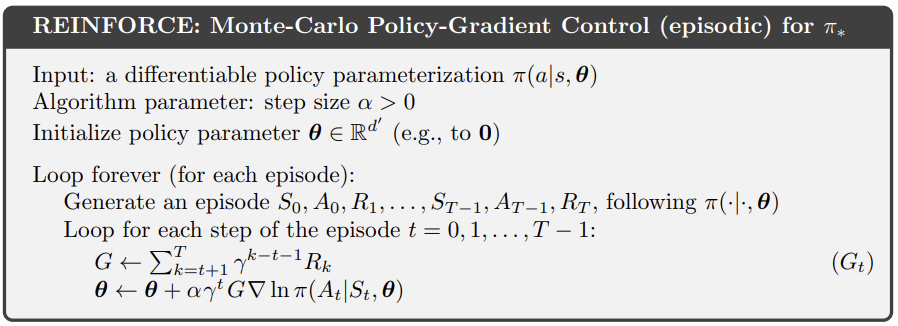


### Actor-Critic Policy Gradient

Yet the algorithm **REINFORCE** has a disadvantage in high gradient variance. 
.
Thus, to reduce variance **critic** can be used instead of **return** to estimate $Q_\pi$.
</br>
</br>
<font size="3">
$$\begin{align}
q_\phi (s, a) = Q_\pi(s, a)
\end{align}$$
</font>

Therefore policy gradient is changed as
</br>
</br>
<font size="3">
$$\begin{align}
\nabla_\theta \mathcal{J}(\theta) = \mathbb{E}_\pi [q_\phi(s,a) \nabla_\theta \log \pi_\theta(s,a)]\\
\theta \leftarrow \theta + \alpha \nabla_\theta \log \pi_\theta (a_t|s_t) q_\phi(s_t, a_t)
\end{align}$$
</font>

And how we can update the critic $q_\phi$? There exists many different methods:

- Monte-Carlo evaluation
- TD(0)
- TD($\lambda$)

For example, if we use TD(0), then in timestep $t$ critic will be updated as
</br>
</br>
<font size="3">
$$\begin{align}
\phi \leftarrow \phi + \beta (r_t + \gamma q_\phi(s_{t+1}, a_{t+1}) - q_\phi(s_t, a_t)) \nabla_\phi q_\phi(s_t, a_t)
\end{align}$$
</font>

#### Reducing a variance using baseline

We can further reduce the variance of the policy gradient by subtracting baseline $B(s)$ from the policy gradient. 

A good baseline can be state value $V_\pi$. 
</br>
</br>
<font size="3">
$$\begin{align}
A_\pi(s, a) = Q_\pi(s, a) - V_\pi(s)
\end{align}$$
</font>

$A_\pi$ is called **Advantage**. It can be intuitively thought as advantage of taking certain action in certain state $s$. 

Considering there are **states** that are more likely to achieve higher reward compared to other states (regardless of policy action), advantage can be better indicator for policy gradient.

Furthermore, we can use TD target, approximating advantage to TD error.
</br>
</br>
<font size="3">
$$\begin{align}
A_\pi(s, a) \doteq r + V_\pi(s') - V_\pi(s)
\end{align}$$
</font>


### Pseudocode of Actor-Critic

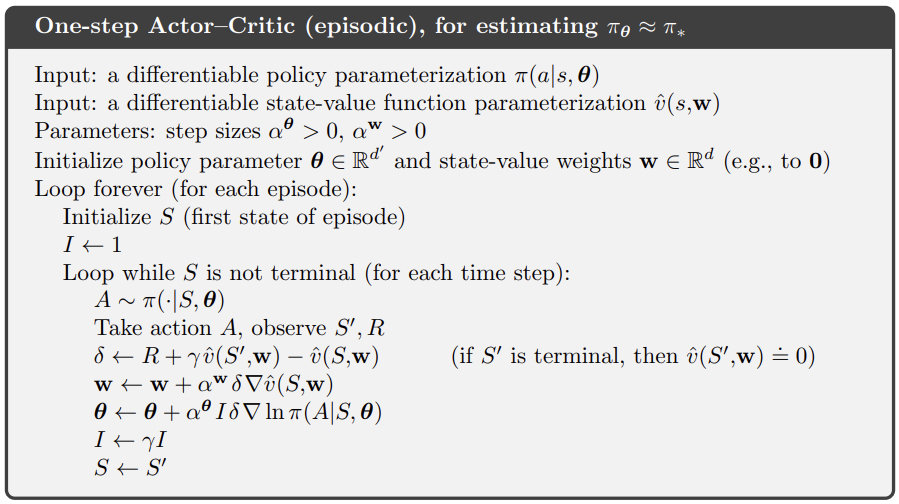
